In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('../input/dataset/Amazon alexa review - code/dataset/amazon_alexa.tsv',sep ='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

In [4]:
data.head()

,rating,variation,verified_reviews,feedback
date,,,,
2018-07-31,5,Charcoal Fabric,Love my Echo!,1
2018-07-31,5,Charcoal Fabric,Loved it!,1
2018-07-31,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
2018-07-31,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
2018-07-31,5,Charcoal Fabric,Music,1


In [5]:
data.isnull().sum()

rating              0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3150 entries, 2018-07-31 to 2018-07-29
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   variation         3150 non-null   object
 2   verified_reviews  3150 non-null   object
 3   feedback          3150 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 123.0+ KB


In [7]:
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

<AxesSubplot:xlabel='variation', ylabel='count'>

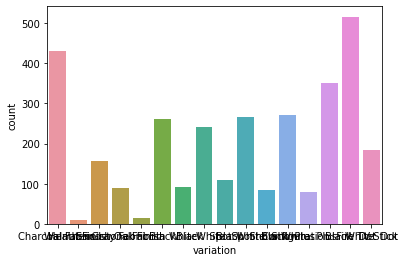

In [8]:
sns.countplot(data['variation'])

In [9]:
data['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

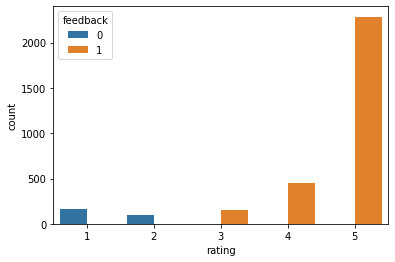

In [10]:
sns.countplot(data['rating'],hue = data['feedback'])

In [11]:
data.groupby(['rating'])['feedback'].value_counts()

# it was obvious to have positive feedback for ratings more than 3 

rating  feedback
1       0            161
2       0             96
3       1            152
4       1            455
5       1           2286
Name: feedback, dtype: int64

In [12]:
len(data)

3150

In [13]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
review = []
for i in range(0,len(data)):
    word = re.sub('[^a-zA-Z]' , ' ' ,data['verified_reviews'][i])
    #data['verified_reviews']= data['verified_reviews'][i].lower()
    word = word.lower()
    word = word.split()
    #word = nltk.word_tokenize(word)
    word = [ps.stem(x) for x in word if not x in stopwords.words('english') ]
    word = ' '.join(word)
    review.append(word)
    

In [15]:
#review

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['variation'] = le.fit_transform(data['variation'])
#data

In [17]:
data['verified_reviews'] = review

In [18]:
from keras.preprocessing.text import Tokenizer


In [19]:
data.shape

(3150, 4)

In [20]:

token = Tokenizer(3105,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
token.fit_on_texts(data['verified_reviews'])
review = token.texts_to_sequences(review)

In [21]:
from keras.preprocessing.sequence import pad_sequences
review = pad_sequences(review,maxlen =80,padding ='post')

In [22]:
x=review
y=data.feedback

In [23]:
x.shape

(3150, 80)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =42)


In [25]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
randomforest.score(x_test,y_test)

0.9412698412698413

In [27]:
predict=randomforest.predict(x_test)

In [28]:
def final_result(input):
    review = []
    for i in range(0,1):
        word = re.sub('[^a-zA-Z]' , ' ' ,input)
        word = word.lower()
        word = word.split()
    
        word = [ps.stem(x) for x in word if not x in stopwords.words('english') ]
        word = ' '.join(word)
        review.append(word)
        
    token = Tokenizer(len(input),filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
    token.fit_on_texts(review)
    review = token.texts_to_sequences(review)
    
    review = pad_sequences(review,maxlen =80,padding ='post')
    
    predict=randomforest.predict(review)
    
    if predict.all() ==1:
        print('feedback is positive')
    else:
        print('feedback is negative')
        

In [29]:

#final_result(str(input("enter feedback : ")))